In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [60]:
df=pd.read_csv(r"C:\Users\Aswin prabu\Downloads\archive (6)\loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [61]:
df.shape
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [62]:
numerical_features=[cols for cols in df.columns if df[cols].dtype!="O"]
numerical_features

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

In [63]:
# List of numerical features
numerical_features = [cols for cols in df.columns if df[cols].dtype != "O"]
categorical_columns=[cols for cols in df.columns if df[cols].dtype == "O"]
print(categorical_columns,"\n",numerical_features)


['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'] 
 ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [29]:
for cols in numerical_features:
    print(df[cols].describe())

count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64
count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64
count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64
count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64
count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max 

In [64]:
# Analyze the target column distribution
print("\nTarget Variable Distribution:\n", df['loan_status'].value_counts())



Target Variable Distribution:
 loan_status
0    35000
1    10000
Name: count, dtype: int64


## Reasonably balanced dataset

In [30]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

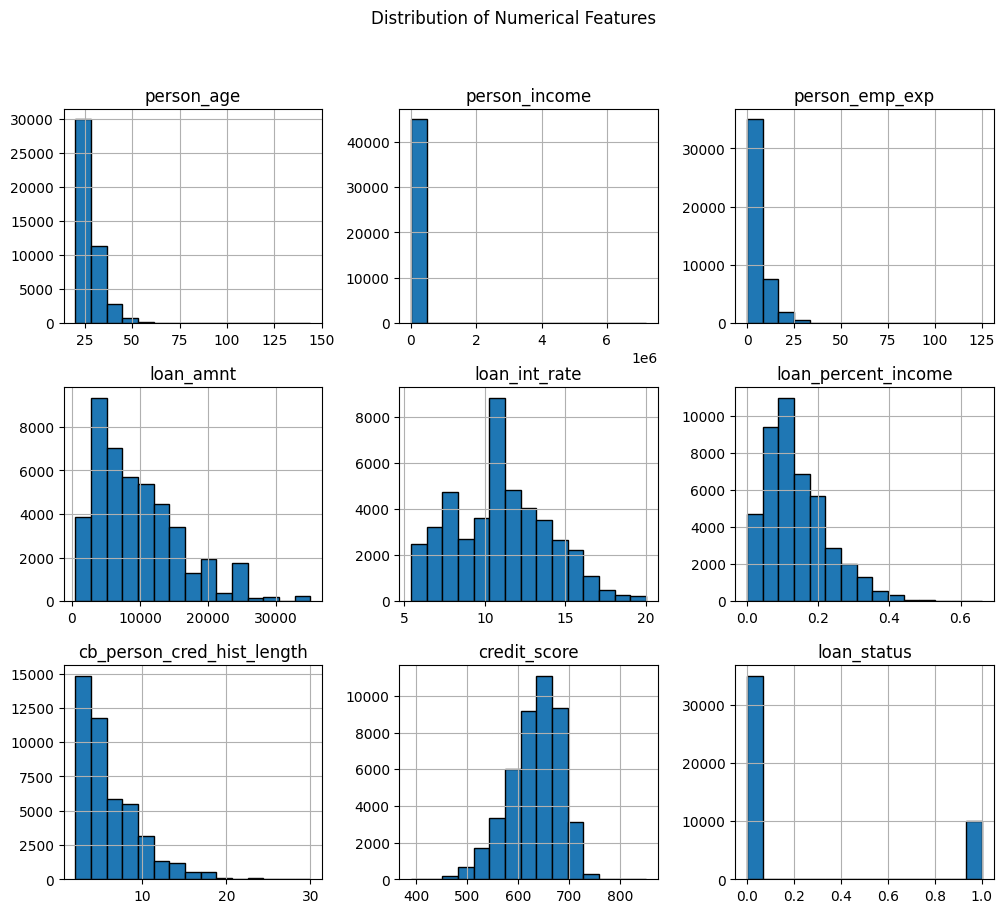

In [38]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
df[numerical_columns].hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()


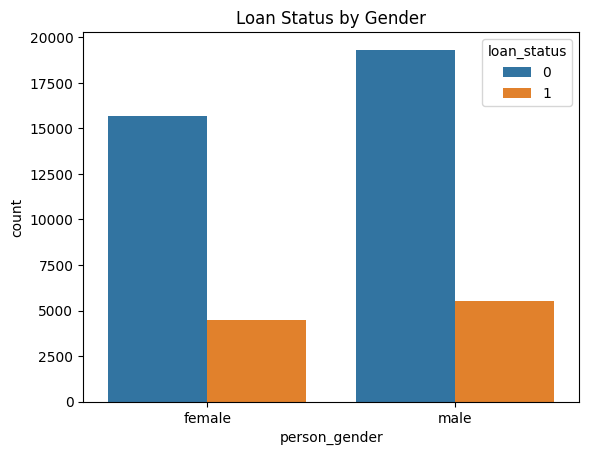

In [39]:
sns.countplot(data=df, x='person_gender', hue='loan_status')
plt.title("Loan Status by Gender")
plt.show()


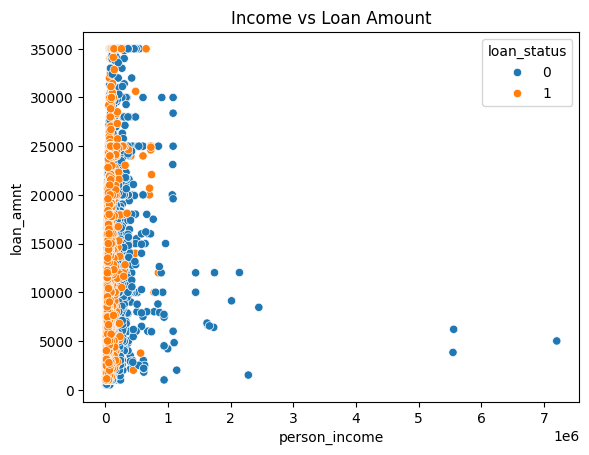

In [40]:
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status')
plt.title("Income vs Loan Amount")
plt.show()


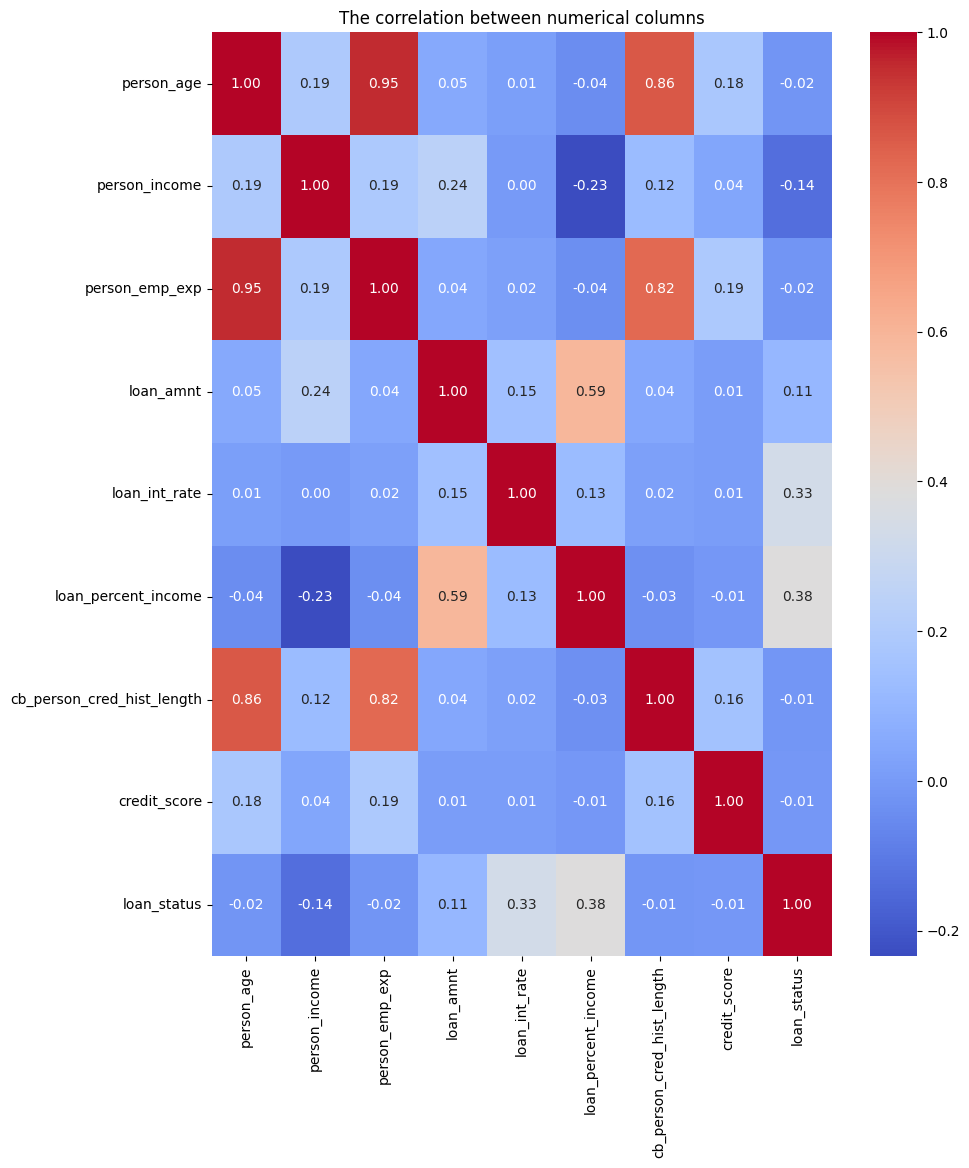

In [ ]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
numerical_corr = df[numerical_columns].corr()
plt.figure(figsize=(10,12))
sns.heatmap(numerical_corr,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("The correlation between numerical columns")
plt.show()

## SINCE THERE IS VERY HIGH CORRELATION BETWEEN AGE AND EXPERIENCE WE MAY DROP ANY ONE OF THIS

## THERE IS ALSO NOT A HIGH CORRELATION BETWEEN THE TARGET VARIABLE AND THE INDEPENDENT VARIABLRES WHICH MIGHT BE A CONCERN

In [66]:
df.drop(columns=["person_emp_exp"],axis=1,inplace=True)

In [67]:
from scipy.stats import pointbiserialr

for col in numerical_columns:
    if 'loan_status' in df.columns:
        corr, _ = pointbiserialr(df['loan_status'].astype(int), df[col])
        print(f"Correlation between loan_status and {col}: {corr:.2f}")


Correlation between loan_status and person_age: -0.02
Correlation between loan_status and person_income: -0.14


KeyError: 'person_emp_exp'

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

cramers_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_matrix


,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
person_gender,0.999955,0.004996,0.003055,0.007186,0.000659
person_education,0.004996,1.0,0.011212,0.016328,0.041314
person_home_ownership,0.003055,0.011212,1.0,0.08283,0.140278
loan_intent,0.007186,0.016328,0.08283,1.0,0.081156
previous_loan_defaults_on_file,0.000659,0.041314,0.140278,0.081156,0.999956


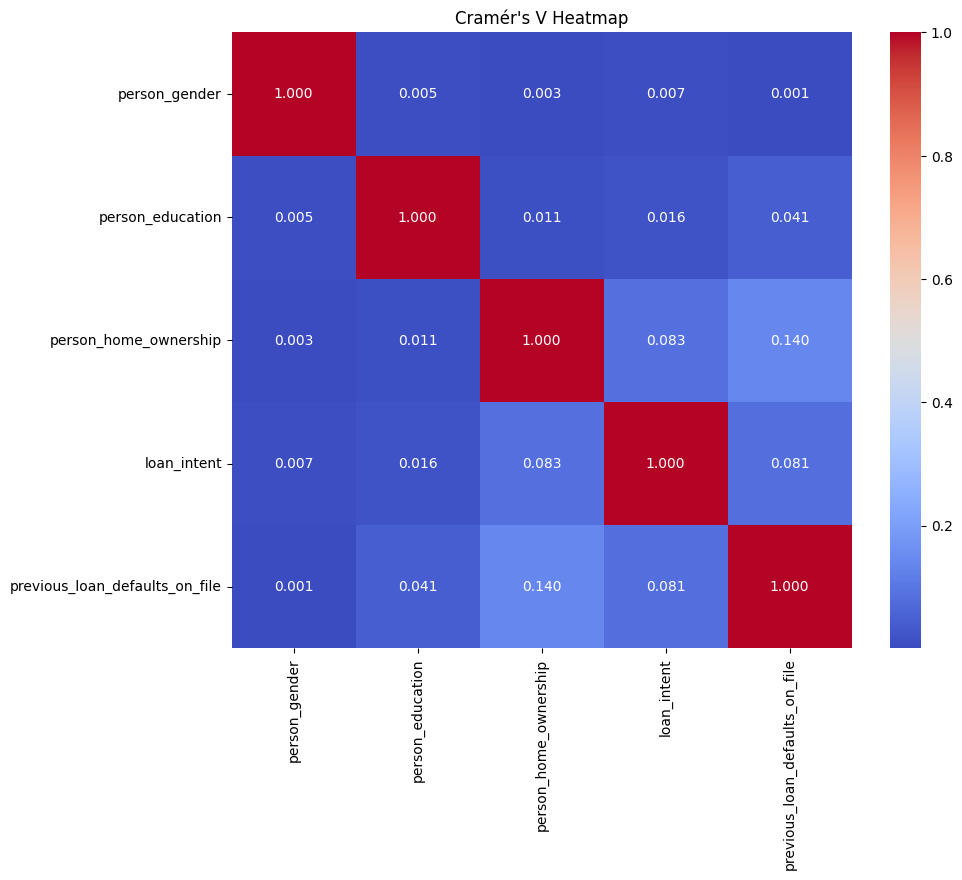

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cramers_matrix = cramers_matrix.astype(float)  
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title("Cramér's V Heatmap")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
label_encoders = {}  

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  


numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
outliers = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers[col].empty:
        outliers[col]



In [71]:
outliers[col]

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,3,35000.0,4,16.02,0.49,3.0,561,0,1
2,25.0,0,3,12438.0,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,3,35000.0,3,14.27,0.53,4.0,586,0,1
5,21.0,0,3,12951.0,2,2500.0,5,7.14,0.19,2.0,532,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [72]:
df

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
X = df.drop(columns=['loan_status']) 
y = df['loan_status']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score:  0.9272222222222222

Confusion Matrix:
 [[6786  204]
 [ 451 1559]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.88      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [77]:
from sklearn.model_selection import RandomizedSearchCV
import random

In [ ]:
from scipy.stats import randint

# Define the hyperparameter space for Random Forest
param_dist = {
    'n_estimators': randint(100, 200),  
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 5),  
    'max_features': ['auto', 'sqrt', 'log2'], 
    'bootstrap': [True, False]  
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of random combinations to try
                                   cv=3,  # 3-fold cross-validation
                                   verbose=2,  # Show progress
                                   random_state=42,
                                   n_jobs=-1)  # Use all processors

random_search.fit(X_train, y_train)

print("Best Hyperparameters: ", random_search.best_params_)

best_rf_model = random_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)

print("\nAccuracy Score: ", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\conda_envs\hex\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
99 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "c:\conda_envs\hex\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\conda_envs\hex\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\conda_envs\hex\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\conda_envs\hex\Lib\site-packages\sklearn\utils\_param_validation.py

Best Hyperparameters:  {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 157}

Accuracy Score:  0.9288888888888889

Confusion Matrix:
 [[6788  202]
 [ 438 1572]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000

